# Example: slab detachment

This example simulates a slab detachment due to buoyancy stress (Schmalholz 2011).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# total model horizontal extent (m)
Lx = 1000 * 1.0e3
# total model vertical extent (m)
Lz = 660 * 1.0e3
# number of points in horizontal direction
Nx = 1001
# number of points in vertical direction
Nz = 601
# thickness of lithosphere (m)
H_litho = 80 * 1.0e3
# width of slab (m)
W_slab = 80 * 1.0e3
# thickness of slab (m)
H_slab = 250 * 1.0e3

x = np.linspace(0, Lx, Nx)
z = np.linspace(Lz, 0, Nz)
X, Z = np.meshgrid(x, z)


##############################################################################
# Interfaces (bottom first)
##############################################################################
center_of_slab = int((Nx - 1) / 2)
n_slab = int(W_slab / x[1]) # x[1] = dx

slab_range = range(center_of_slab - n_slab // 2, center_of_slab + n_slab // 2)

litho = np.ones(Nx) * H_litho
litho[slab_range] = litho[slab_range] + H_slab

interfaces = {
    "litho": litho
}

# Create the interfaces file
with open("interfaces.txt", "w") as f:
    layer_properties = f"""
        C   1.0         1.0
        rho 3150.0      3300.0
        H   0.0         0.0
        A   1.0e-21     1.96438e-47
        n   1.0         4.0
        Q   0.0e3       0.0e3
        V   0.0e-6      0.0
    """

    for line in layer_properties.split("\n"):
        line = line.strip()
        if len(line):
            f.write(" ".join(line.split()) + "\n")

    # layer interfaces
    data = -1 * np.array(tuple(interfaces.values())).T
    np.savetxt(f, data, fmt="%.1f")

# Plot interfaces
##############################################################################
fig, ax = plt.subplots(figsize=(16, 8))

for label, layer in interfaces.items():
    ax.plot(x, layer, label=f"{label}")

ax.set_xticks(np.arange(0, Lx + 1, 100 * 1.0e3))
ax.set_yticks(np.arange(-Lz, 0 + 1, 10 * 1.0e3))

ax.set_xlim([0, Lx])
ax.set_ylim([Lz, 0])

plt.legend()
plt.savefig("interfaces.png")
plt.close()

##############################################################################
# Parameters file
##############################################################################
params = f"""
nx = {Nx}
nz = {Nz}
lx = {Lx}
lz = {Lz}

# Simulation options
multigrid                           = 1
solver                              = direct        # default is direct [direct/iterative]
denok                               = 1.0e-15       # default is 1.0E-4
particles_per_element               = 40          # default is 81
particles_perturb_factor            = 0.7           # default is 0.5 [values are between 0 and 1]
rtol                                = 1.0e-7        # the absolute size of the residual norm (relevant only for iterative methods), default is 1.0E-5
RK4                                 = Euler         # default is Euler [Euler/Runge-Kutta]
Xi_min                              = 1.0e-7       # default is 1.0E-14
random_initial_strain               = 0.3           # default is 0.0
pressure_const                      = -1.0          # default is -1.0 (not used) - useful only in horizontal 2D models
initial_dynamic_range               = True         # default is False [True/False]
periodic_boundary                   = False         # default is False [True/False]
high_kappa_in_asthenosphere         = False         # default is False [True/False]
K_fluvial                           = 2.0e-7        # default is 2.0E-7
m_fluvial                           = 1.0           # default is 1.0
sea_level                           = 0.0           # default is 0.0
basal_heat                          = 0.0          # default is -1.0

# Surface processes
sp_surface_tracking                 = False         # default is False [True/False]
sp_surface_processes                = False         # default is False [True/False]
sp_dt                               = 1.0e5        # default is 0.0
sp_d_c                              = 1.0          # default is 0.0
plot_sediment                       = False         # default is False [True/False]
a2l                                 = True          # default is True [True/False]

free_surface_stab                   = True          # default is True [True/False]
theta_FSSA                          = 0.5           # default is 0.5 (only relevant when free_surface_stab = True)

# Time constrains
step_max                            = 5000          # Maximum time-step of the simulation
time_max                            = 25.0e6        # Maximum time of the simulation [years]
dt_max                              = 1.0e6        # Maximum time between steps of the simulation [years]
step_print                          = 10            # Make file every <step_print>
sub_division_time_step              = 0.5           # default is 1.0
initial_print_step                  = 1             # default is 0
initial_print_max_time              = 1.0e6         # default is 1.0E6 [years]

# Viscosity
viscosity_reference                 = 3.0e22        # Reference viscosity [Pa.s]
viscosity_max                       = 1.0e25        # Maximum viscosity [Pa.s]
viscosity_min                       = 1.0e21        # Minimum viscosity [Pa.s]
viscosity_per_element               = constant      # default is variable [constant/variable]
viscosity_mean_method               = harmonic      # default is harmonic [harmonic/arithmetic]
viscosity_dependence                = pressure      # default is depth [pressure/depth]

# External ASCII inputs/outputs
interfaces_from_ascii               = True          # default is False [True/False]
n_interfaces                        = {len(interfaces.keys())}           # Number of interfaces int the interfaces.txt file
variable_bcv                        = False         # default is False [True/False]
temperature_from_ascii              = True          # default is False [True/False]
velocity_from_ascii                 = False         # default is False [True/False]
binary_output                       = False         # default is False [True/False]
sticky_blanket_air                  = False         # default is False [True/False]
precipitation_profile_from_ascii    = False         # default is False [True/False]
climate_change_from_ascii           = False         # default is False [True/False]


print_step_files                    = True          # default is True [True/False]
checkered                           = False         # Print one element in the print_step_files (default is False [True/False])

sp_mode                             = 1             # default is 1 [0/1/2]

geoq                                = on
geoq_fac                            = 100.0

# Physical parameters
temperature_difference              = 0.0
thermal_expansion_coefficient       = 3.28e-5
thermal_diffusivity_coefficient     = 1.0e-6
gravity_acceleration                = 9.81
density_mantle                      = 3300.0
external_heat                       = 0.0e-12
heat_capacity                       = 1250.0

non_linear_method                   = on
adiabatic_component                 = off
radiogenic_component                = off
plasticity                          = off

# Velocity boundary conditions
top_normal_velocity                 = fixed
top_tangential_velocity             = free
bot_normal_velocity                 = fixed
bot_tangential_velocity             = free
left_normal_velocity                = fixed
left_tangential_velocity            = fixed
right_normal_velocity               = fixed
right_tangential_velocity           = fixed

surface_velocity                    = 0.0e-2
multi_velocity                      = False         # default is False [True/False]

# Temperature boundary conditions
top_temperature                     = fixed
bot_temperature                     = fixed
left_temperature                    = fixed
right_temperature                   = fixed

rheology_model                      = 9
T_initial                           = 3
"""
# Create the parameter file
with open("param.txt", "w") as f:
    for line in params.split("\n"):
        line = line.strip()
        f.write(line + "\n")

##############################################################################
# Initial temperature field
##############################################################################

T = np.zeros_like(z) # Temperature
T = np.zeros_like(X) * T[:, None]

# Save the initial temperature file
np.savetxt("input_temperature_0.txt", np.reshape(T, (Nx * Nz)), header="T1\nT2\nT3\nT4")

# Plot temperature field and thermal profile
##############################################################################

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax0.pcolormesh(X / 1.0e3, Z / 1.0e3, T)
ax0.set_ylim(Lz / 1.0e3, 0)
ax0.set_xlabel("km")
ax0.set_ylabel("km")
ax1.set_xlabel("$^\circ$C")

for label, layer in interfaces.items():
    ax0.plot(x / 1.0e3, layer/ 1.0e3, color="C0", label=f"{label}")
    ax1.axhline(y=interfaces[label][0] / 1.0e3, color=f"C0", label=f"{label}")

ax1.plot(T[:, 0], z / 1.0e3, "-k")

ax1.set_ylim(Lz / 1.0e3, 0)
plt.legend()
plt.savefig("temperature_field.png")
plt.close()

## Run the model

You can run the model as:

```
mpirun -n NUMBER_OF_CORES mandyoc
```

You have to change NUMBER_OF_CORES.

## Post-processing

### Plot the results


0
100
500
1000


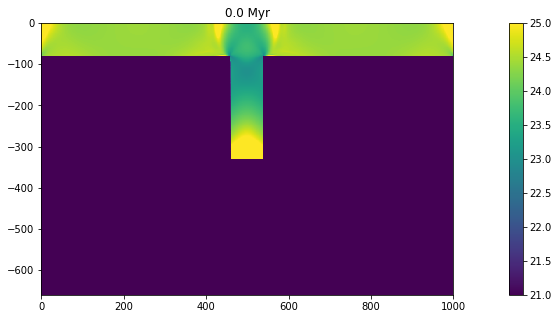

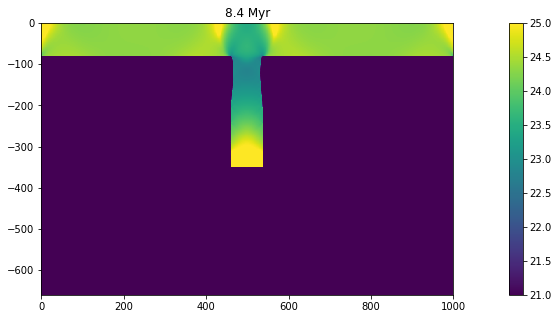

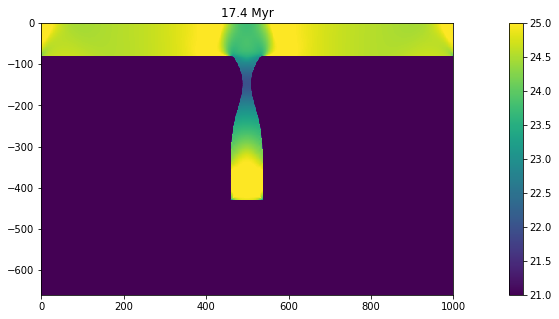

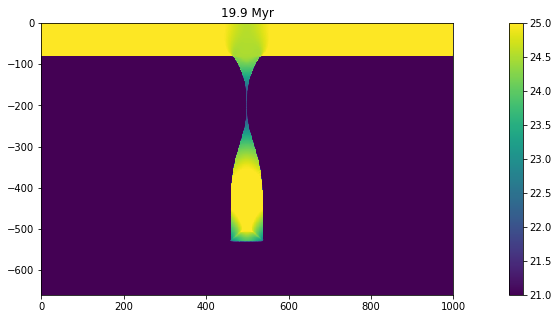

In [21]:
with open("param.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    line = line.split()
    Nx = int(line[2])
    line = f.readline()
    line = line.split()
    Nz = int(line[2])
    line = f.readline()
    line = line.split()
    Lx = float(line[2])
    line = f.readline()
    line = line.split()
    Lz = float(line[2])
    
xi = np.linspace(0,Lx/1000,Nx)
zi = np.linspace(-Lz/1000,0,Nz)
xx,zz = np.meshgrid(xi,zi)

for cont in [0,100,500,1000]:
    print(cont)
    plt.figure()
    
    # Read time
    with open ("time_%d.txt"%(cont)) as f:
        line = f.readline()
        line = line.split()
        time = float(line[2])

    A = np.loadtxt("viscosity_"+str(cont)+".txt",unpack=True,comments="P",skiprows=2)
    TT = A*1.0
    TT[np.abs(TT)<1.0E-200]=0
    TTT = np.reshape(TT,(Nx,Nz),order='F')
    plt.close()
    plt.figure(figsize=(10*2,2.5*2))

    TTT = TTT[:-1,:-1]
    TTT = np.transpose(TTT)
    plt.imshow(np.log10(TTT[::-1]),extent=(0,Lx/1000,-Lz/1000,0))
    plt.colorbar()
    
    plt.title("%.1f Myr"%(time/1.0E6))

    #plt.savefig("Viscosity_%03d.png"%(cont))

## Calculate the necking width through time

In [28]:

xfine = np.linspace(0,Lx/1000,1000001)

tt = []
width = []

for cont in range(0,1600,20):

    # Read time
    with open ("time_%d.txt"%(cont)) as f:
        line = f.readline()
        line = line.split()
        time = float(line[2])
    

    A = np.loadtxt("density_"+str(cont)+".txt",unpack=True,comments="P",skiprows=2)
    TT = A*1.0
    TT[np.abs(TT)<1.0E-200]=0
    TTT = np.reshape(TT,(Nx,Nz),order='F')

    TTT = np.transpose(TTT)
    
    soma = 1.0E6
    for i in range(310,510,10):
        vals = np.interp(xfine,xi,TTT[i,:])
        cond = vals>3200.0
        aux = np.sum(cond)*Lx/1.0E6
        if soma>aux:
            soma=aux

    if cont%200==0:
        print(cont,time,soma)

    tt = np.append(tt,time)
    width = np.append(width,soma)

np.savetxt('widths.txt', np.c_[tt,width])

0 0.0 79779.0
200 12761000.0 51892.0
400 16511000.0 28910.0
600 18081000.0 13830.0
800 19066000.0 6020.0
1000 19880000.0 3323.0
1200 20671000.0 2192.0
1400 21566000.0 1946.0


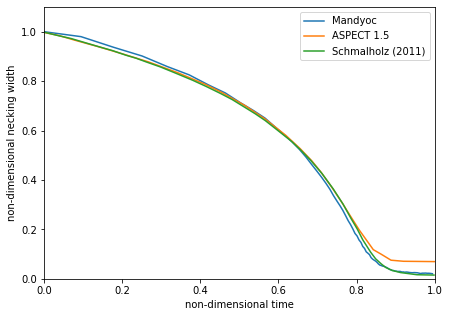

In [32]:
mt,mw = np.loadtxt("widths.txt",unpack=True)
seg_per_ano = 365.0*24.0*60.0*60.0

plt.figure(figsize=(7,5))

mt *= seg_per_ano/7.1158E14#np.max(mt)
mw /= np.max(mw)

At,Aw = np.loadtxt("aspect_width.txt",unpack=True)

st,sw = np.loadtxt("schmalholz.txt",unpack=True)

plt.plot(mt,mw,label="Mandyoc")
plt.plot(At,Aw,label="ASPECT 1.5")
plt.plot(st,sw,label="Schmalholz (2011)")

plt.legend()

plt.xlim(0,1)
plt.ylim(0,1.1)

plt.xlabel("non-dimensional time")

plt.ylabel("non-dimensional necking width")

plt.savefig("compare_widths.png")